/tmp/ipykernel_4690/3784038286.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



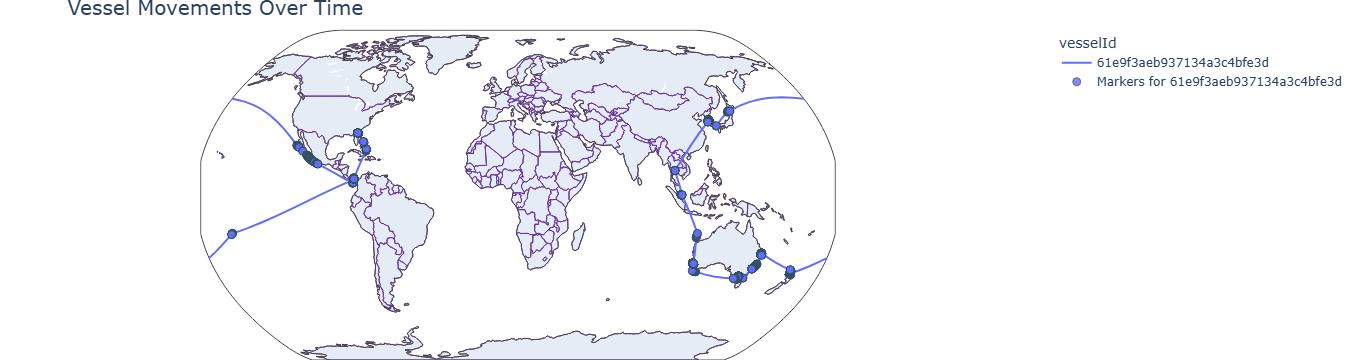

/tmp/ipykernel_4690/3784038286.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



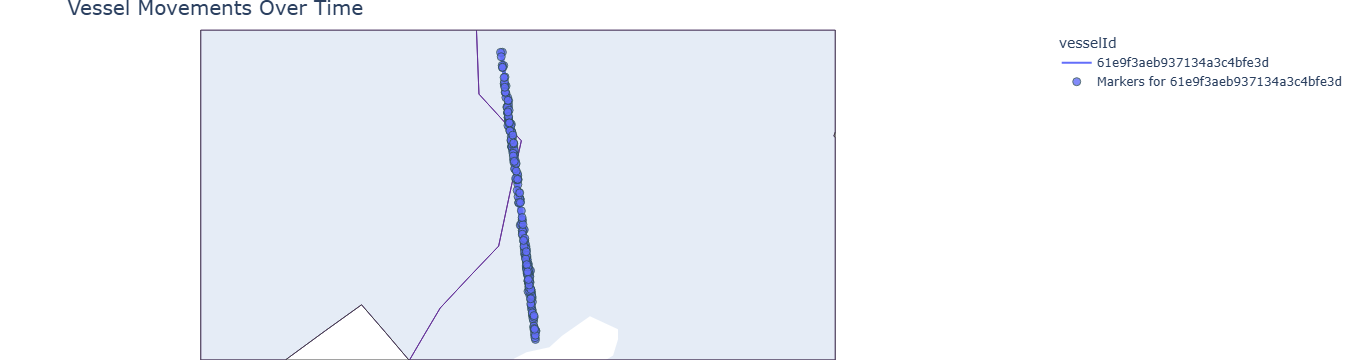

/tmp/ipykernel_4690/3784038286.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



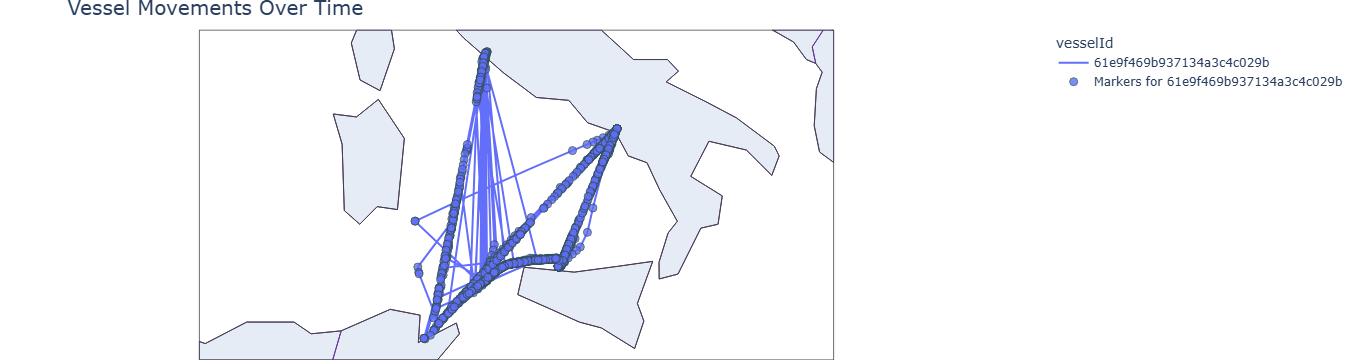

/tmp/ipykernel_4690/3784038286.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



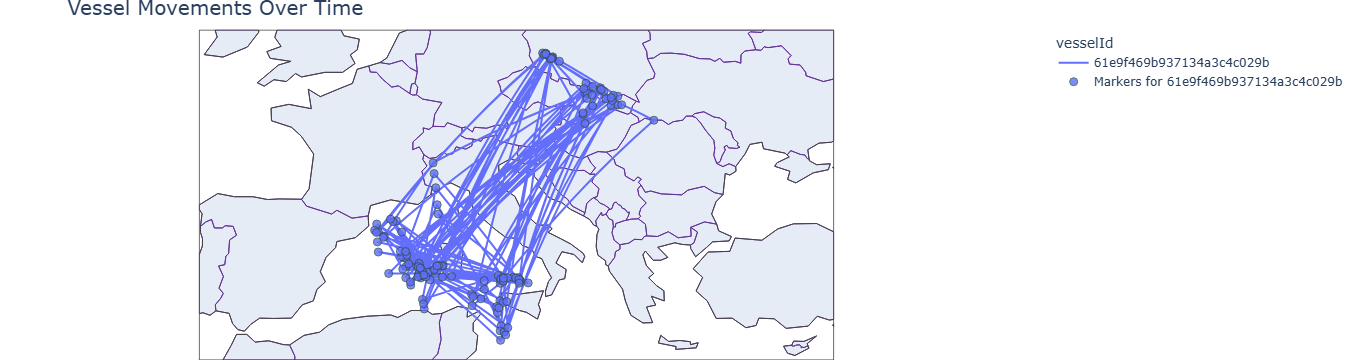

In [7]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

train = pd.read_csv("ais_train.csv", sep='|')
res = pd.read_csv('res.csv')
test = pd.read_csv("ais_test.csv")
train['time'] = pd.to_datetime(train['time'])
test['time'] = pd.to_datetime(test['time'])
res.head()
res2 = test.copy()
res2['longitude'] = res['longitude_predicted']
res2['latitude'] = res['latitude_predicted']




def visualize_vessel_movements(df):
    """
    Visualize vessel movements on a map with lines and markers for each data point.

    Parameters:
    - df (pandas.DataFrame): A DataFrame with columns ['time', 'latitude', 'longitude', 'vesselId'].

    Returns:
    - A Plotly interactive figure.
    """
    # Ensure 'time' is in datetime format for better tooltip handling
    df['time'] = pd.to_datetime(df['time'])
    
    # Sorting the DataFrame by time to ensure lines are drawn correctly
    df = df.sort_values(by=['vesselId', 'time'])

    # Define a color palette
    color_map = px.colors.qualitative.Plotly

    # Mapping each vessel ID to a color
    unique_vessels = df['vesselId'].unique()
    colors = {vessel_id: color_map[i % len(color_map)] for i, vessel_id in enumerate(unique_vessels)}

    # Create the base map with lines
    fig = px.line_geo(df,
                      lat='latitude',
                      lon='longitude',
                      color='vesselId',
                      color_discrete_map=colors,
                      hover_name='vesselId',
                      hover_data={'time': True, 'latitude': ':.3f', 'longitude': ':.3f'},
                      projection='natural earth',
                      title='Vessel Movements Over Time')

    # Add markers for each data point
    for vessel_id in unique_vessels:
        vessel_data = df[df['vesselId'] == vessel_id]
        fig.add_trace(go.Scattergeo(
            lon=vessel_data['longitude'],
            lat=vessel_data['latitude'],
            mode='markers',
            marker=dict(
                size=8,
                color=colors[vessel_id],
                opacity=0.8,
                line=dict(width=1, color='DarkSlateGrey')
            ),
            name=f'Markers for {vessel_id}',
            hoverinfo='text',
            text=vessel_data.apply(lambda row: f'ID: {vessel_id}<br>Time: {row["time"]}<br>Lat: {row["latitude"]:.3f}<br>Lon: {row["longitude"]:.3f}', axis=1)
        ))

    # Enhancing map and layout details
    fig.update_geos(fitbounds="locations", showcountries=True, countrycolor="RebeccaPurple")
    fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0},
                      coloraxis_colorbar=dict(title="Vessel ID"),
                      title_font_size=20)
    
    return fig



fig = visualize_vessel_movements(
    train[train['vesselId'] == '61e9f3aeb937134a3c4bfe3d']
)
fig.show()  

fig = visualize_vessel_movements(
    res2[res2['vesselId'] == '61e9f3aeb937134a3c4bfe3d']
)

fig.show() 

fig = visualize_vessel_movements(
    train[train['vesselId'] == '61e9f469b937134a3c4c029b']
)
fig.show()  

fig = visualize_vessel_movements(
    res2[res2['vesselId'] == '61e9f469b937134a3c4c029b']
)

fig.show() 